# California Housing Price Prediction Project

## Prjoect Goal

The purpose of the project is to predict median house values in Californian districts, given many features from these districts. The project also aims at building a model of housing prices in California using the California census data. The data has metrics such as the population, median income, median housing price, and so on for each block group in California. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## Load Modules/Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [55]:
df = pd.read_csv("Housing Data.csv")

In [56]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Explporatory Data Analysis and Data Cleaning

In [57]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [58]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [59]:
df.shape

(20640, 10)

In [60]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [62]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [63]:
df.value_counts

<bound method DataFrame.value_counts of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       popu

In [64]:
df.nunique

<bound method DataFrame.nunique of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       populatio

In [65]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [66]:
df.dropna(inplace=True)

In [67]:
df.total_bedrooms.isnull().sum()

0

In [68]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Null values have been removed.

In [69]:
df.median_income.value_counts()

3.1250     49
15.0001    48
2.8750     46
4.1250     44
2.6250     44
           ..
6.0723      1
4.6992      1
5.4042      1
6.7744      1
2.0943      1
Name: median_income, Length: 12825, dtype: int64

In [70]:
df.median_income.value_counts().sum()

20433

# Splitting Data into train and test

In [71]:
x = df.drop(['median_house_value'], axis=1)

In [72]:
y = df.median_house_value

In [73]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [74]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

# combinig Train Data for interpretation through some visualisations

In [24]:
train_data = x_train.join(y_train)

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2518,-122.13,39.74,20,1401,280.0,668,250,2.2569,INLAND,94300
11511,-118.11,33.73,32,1258,333.0,645,334,5.0476,NEAR OCEAN,500001
8557,-118.40,33.93,35,2217,447.0,1000,450,4.7319,<1H OCEAN,376100
5778,-118.26,34.15,14,2981,894.0,1941,863,3.0000,<1H OCEAN,178600
1161,-121.54,39.51,33,3585,757.0,1887,765,2.5020,INLAND,62100
...,...,...,...,...,...,...,...,...,...,...
1106,-121.60,39.80,10,1742,307.0,721,312,2.4537,INLAND,117900
19081,-122.48,38.31,29,2375,560.0,1124,502,2.3276,<1H OCEAN,166200
11915,-117.40,33.95,46,2189,423.0,866,389,3.1384,INLAND,111500
6709,-118.15,34.14,52,403,117.0,361,105,1.6250,<1H OCEAN,187500


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

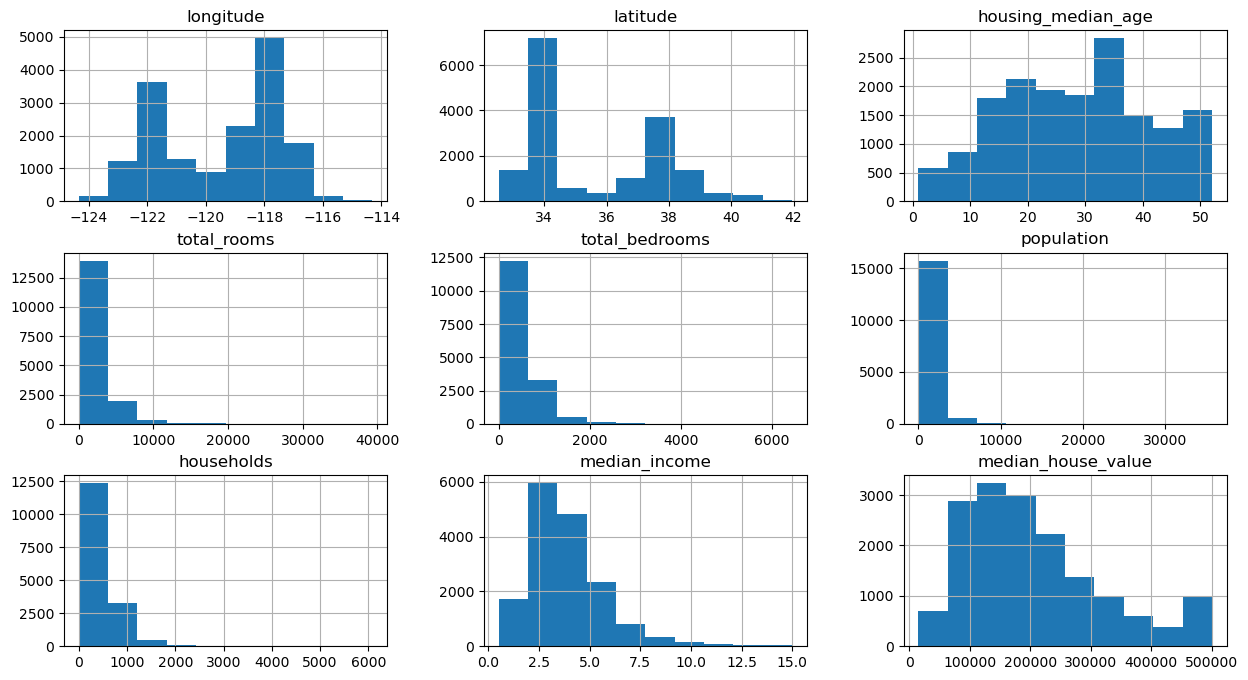

In [28]:
train_data.hist(figsize=(15,8))

In [29]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924641,-0.115105,0.041673,0.064607,0.095802,0.050579,-0.013082,-0.042526
latitude,-0.924641,1.000000,0.016029,-0.032829,-0.062098,-0.105209,-0.066641,-0.081778,-0.146616
housing_median_age,-0.115105,0.016029,1.000000,-0.359047,-0.320782,-0.294075,-0.301494,-0.113630,0.107148
total_rooms,0.041673,-0.032829,-0.359047,1.000000,0.929783,0.853380,0.918067,0.196223,0.134643
total_bedrooms,0.064607,-0.062098,-0.320782,0.929783,1.000000,0.874996,0.978691,-0.010787,0.049845
population,0.095802,-0.105209,-0.294075,0.853380,0.874996,1.000000,0.905963,-0.000229,-0.025813
households,0.050579,-0.066641,-0.301494,0.918067,0.978691,0.905963,1.000000,0.010330,0.065421
median_income,-0.013082,-0.081778,-0.113630,0.196223,-0.010787,-0.000229,0.010330,1.000000,0.691863
median_house_value,-0.042526,-0.146616,0.107148,0.134643,0.049845,-0.025813,0.065421,0.691863,1.000000


<AxesSubplot:>

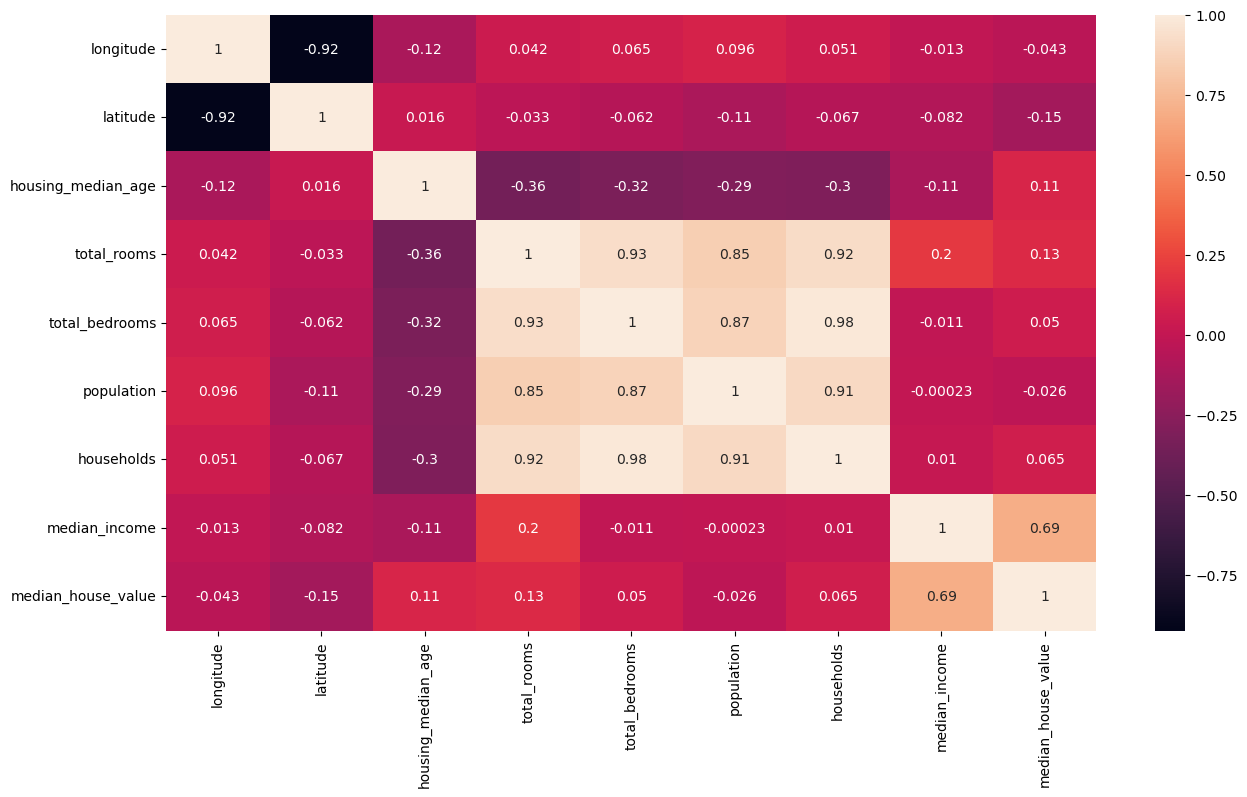

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True )

In [32]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [33]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2518,-122.13,39.74,20,1401,280.0,668,250,2.2569,94300,0,1,0,0,0
11511,-118.11,33.73,32,1258,333.0,645,334,5.0476,500001,0,0,0,0,1
8557,-118.40,33.93,35,2217,447.0,1000,450,4.7319,376100,1,0,0,0,0
5778,-118.26,34.15,14,2981,894.0,1941,863,3.0000,178600,1,0,0,0,0
1161,-121.54,39.51,33,3585,757.0,1887,765,2.5020,62100,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,-121.60,39.80,10,1742,307.0,721,312,2.4537,117900,0,1,0,0,0
19081,-122.48,38.31,29,2375,560.0,1124,502,2.3276,166200,1,0,0,0,0
11915,-117.40,33.95,46,2189,423.0,866,389,3.1384,111500,0,1,0,0,0
6709,-118.15,34.14,52,403,117.0,361,105,1.6250,187500,1,0,0,0,0


<AxesSubplot:>

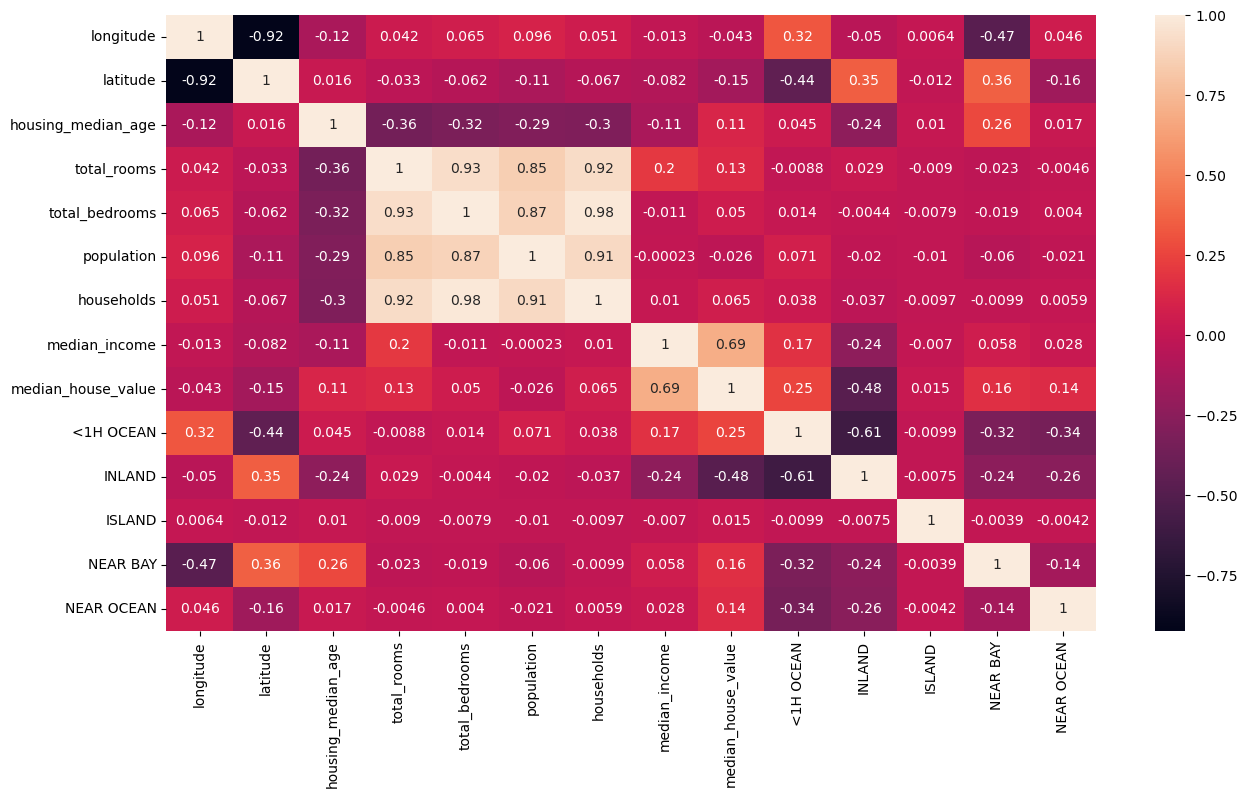

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True )

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

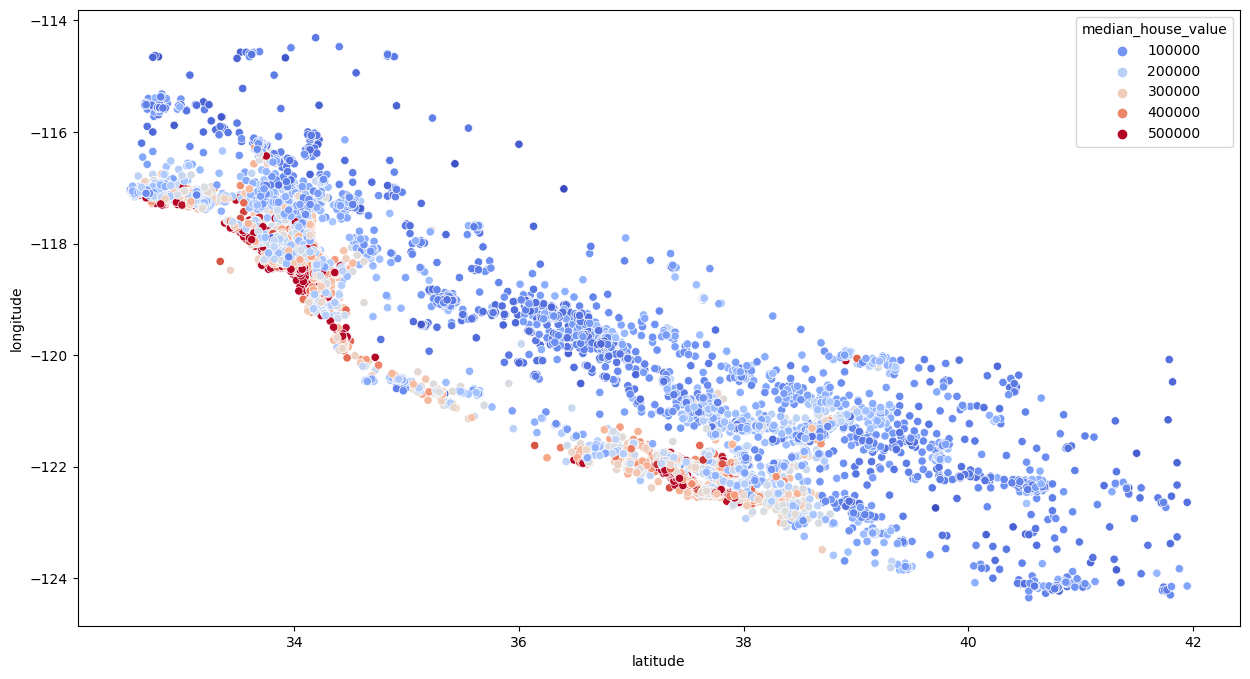

In [95]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude', data= train_data , hue='median_house_value', palette='coolwarm')

# Now using Random Forest Algorithm as our model.

converting categorical Data into numericals.

In [77]:
import category_encoders as ce

In [78]:
encode = ce.OrdinalEncoder(cols=['ocean_proximity'])

In [79]:
x_train = encode.fit_transform(x_train)

In [80]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2518,-122.13,39.74,20,1401,280.0,668,250,2.2569,1
11511,-118.11,33.73,32,1258,333.0,645,334,5.0476,2
8557,-118.40,33.93,35,2217,447.0,1000,450,4.7319,3
5778,-118.26,34.15,14,2981,894.0,1941,863,3.0000,3
1161,-121.54,39.51,33,3585,757.0,1887,765,2.5020,1
...,...,...,...,...,...,...,...,...,...
1106,-121.60,39.80,10,1742,307.0,721,312,2.4537,1
19081,-122.48,38.31,29,2375,560.0,1124,502,2.3276,3
11915,-117.40,33.95,46,2189,423.0,866,389,3.1384,1
6709,-118.15,34.14,52,403,117.0,361,105,1.6250,3


In [81]:
x_test = encode.transform(x_test)

In [82]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
356,-122.16,37.76,36,2781,574.0,1438,519,2.4598,4
2192,-119.95,36.80,30,1233,214.0,620,199,3.4297,1
9161,-118.49,34.42,23,4166,756.0,2082,743,4.4107,3
168,-122.24,37.79,27,1632,492.0,1171,429,2.3173,4
13155,-121.45,36.86,11,1613,335.0,1617,342,3.1375,1
...,...,...,...,...,...,...,...,...,...
6376,-118.03,34.15,43,1694,283.0,674,267,4.1797,1
13919,-115.85,34.20,34,3868,1257.0,890,423,1.3571,1
4323,-118.35,34.09,42,2210,643.0,1228,605,2.5982,3
3324,-122.89,38.93,20,1214,247.0,504,223,2.7188,3


In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rfc = RandomForestRegressor(n_estimators=100,random_state=0)

In [89]:
rfc.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [90]:
y_pred = rfc.predict(x_test)

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test,y_pred)

0.8153080944078309

We can see that accuracy of our model is 81.5%.